In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

In [3]:
data = pd.read_csv('data_preprocessed.csv')

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.000000,0.999998,0.002174,0.000232,0.000077,0.0,0.000232,0.000155,0.000077,0.000309,0.000000,No
1,0.0,0.0,0.000000,0.999659,0.024563,0.002717,0.001358,0.0,0.002717,0.002717,0.002717,0.006792,0.001358,No
2,0.0,0.0,0.000566,0.999960,0.008437,0.001699,0.001133,0.0,0.001133,0.001133,0.000566,0.001133,0.000566,No
3,0.0,0.0,0.000000,0.999996,0.002643,0.000144,0.000144,0.0,0.000217,0.000072,0.000072,0.000289,0.000000,No
4,0.0,0.0,0.000000,0.999995,0.003069,0.000146,0.000073,0.0,0.000146,0.000146,0.000073,0.000437,0.000073,No


In [9]:
y = pd.DataFrame(data['13'])
X = data.drop(['13'],axis=1)

In [10]:
y.head()

,13
0,No
1,No
2,No
3,No
4,No


In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.000000,0.999998,0.002174,0.000232,0.000077,0.0,0.000232,0.000155,0.000077,0.000309,0.000000
1,0.0,0.0,0.000000,0.999659,0.024563,0.002717,0.001358,0.0,0.002717,0.002717,0.002717,0.006792,0.001358
2,0.0,0.0,0.000566,0.999960,0.008437,0.001699,0.001133,0.0,0.001133,0.001133,0.000566,0.001133,0.000566
3,0.0,0.0,0.000000,0.999996,0.002643,0.000144,0.000144,0.0,0.000217,0.000072,0.000072,0.000289,0.000000
4,0.0,0.0,0.000000,0.999995,0.003069,0.000146,0.000073,0.0,0.000146,0.000146,0.000073,0.000437,0.000073


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [14]:
y_train.value_counts()

13 
No     10191
Yes      594
dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
y_train.value_counts()

13 
Yes    10191
No     10191
dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

13 
Yes    10191
No     10191
dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
# r_squared = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# rmse = math.sqrt(mse)
# mae = mean_absolute_error(y_test, predictions)

0.1996940620219719


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
# r_squared = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# rmse = math.sqrt(mse)
# mae = mean_absolute_error(y_test, predictions)

0.8278403560005563


In [45]:
scores = []
for i in range(1,40,1):
    model = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

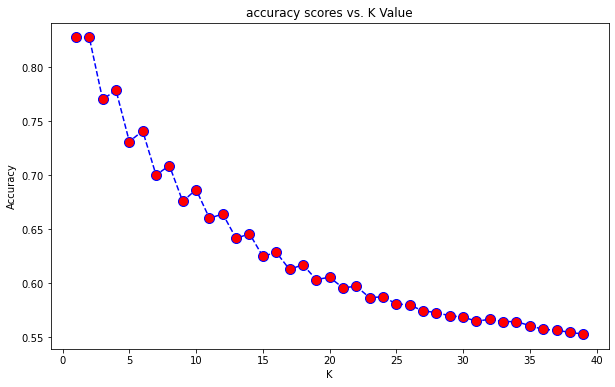

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,1),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[5843,  919],
       [ 319,  110]], dtype=int64)

In [40]:
predictions.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [37]:
print("The accuracy of the model on test set is: %4.2f " % model.score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
#plot_confusion_matrix(model, X_test, y_test, normalize='pred')  # doctest: +SKIP
#plt.show()  # doctest: +SKIP
# print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

ValueError: could not convert string to float: 'No'

NameError: name 'plot_confusion_matrix' is not defined